In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)

/Users/JacquesPierre/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [67]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [68]:
#your code here

zero_dict = {88:0,
             77: np.nan,
             99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [69]:
#descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

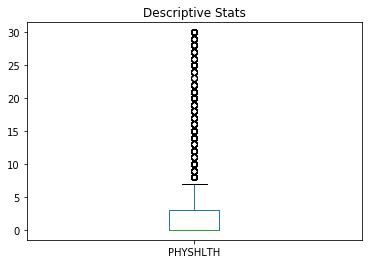

In [70]:
# graphic showing those descriptive stats
df['PHYSHLTH'].plot(kind='box',title='Descriptive Stats');

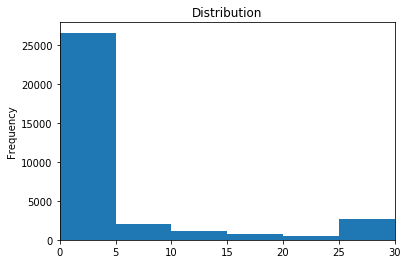

In [71]:
#graphic showing the distribution of data
df['PHYSHLTH'].plot(title='Distribution',kind='hist', bins=6, xticks=(0,5,10,15,20,25,30) ,xlim=(0,30));

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [72]:
# code to calculate the average number of sick days by state
sick_days = pd.DataFrame(df.groupby('_STATE')['PHYSHLTH'].agg('mean'))
sick_days

,PHYSHLTH
_STATE,
9.0,3.688562
34.0,4.380957
36.0,4.148030


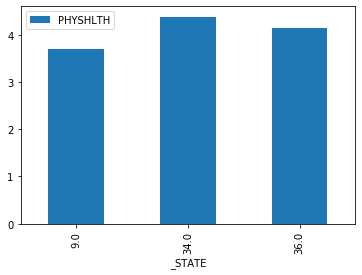

In [73]:
# code to graph those averages using matplotlib
sick_days.plot(kind='bar');

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [84]:
# code to create new colum for chronically sick
df['Chronically Sick'] = 0
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['Chronically Sick'] = df.apply(is_Chronic, axis=1)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,Chronically Sick
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [88]:
# code to calculate averages per state
chronSick_ppl = pd.DataFrame(df.groupby('_STATE')['Chronically Sick'].agg('mean'))
chronSick_ppl

,Chronically Sick
_STATE,
9.0,0.112864
34.0,0.136317
36.0,0.125316


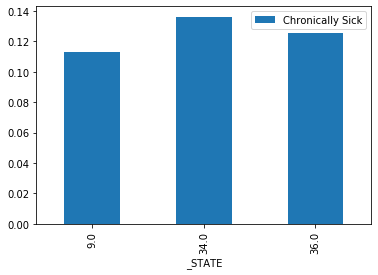

In [89]:
# create graphic to compare chronically sick by state
chronSick_ppl.plot(kind='bar');

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  